# Assignment 1

- Computer Vision 수업
- 교수 : 김낙현 

```bash
학과 : 컴퓨터전자시스템 공학부
학번 : 201600765
이름 : 김주원
```

## 1번 문항

- 파일에서 읽은 영상에 대해 가로 세로를 1/3로 줄인 영상을 생성하는 함수를 작성함. China 영상을 이용하여 결과를 확인
- 코드 설명 : resize함수에 행과 열 크기를 1/3로 줄여서 넣어주어서 크기를 조정해주었고, 이전과 이후의 크기를 shape에 넣어주어 1/3 크기로 줄어든 것을 확인할 수 있었습니다. 

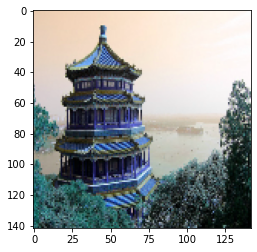

이전 shape: (427, 640, 3)
현재 shape: (142, 142, 3)


In [137]:
import cv2 as cv
import matplotlib.pyplot as plt

# 파일을 읽어오기
img=cv.imread("china.jpg")

#현재 shpae 체크
before_shape = img.shape

# 이미지 1/3 resize 
r,c = img.shape[:2]
# 행, 열을 1/3 크기로 줄여주고, 나누어 떨어지지 않을 경우 분수꼴이 되지 않도록 조절
new_r = int((1/3)*r)
new_c = int((1/3)*r)
new_img = cv.resize(img, (new_r,new_c))

# resize이후 이미지 shape 체크
after_shape = new_img.shape

plt.imshow(new_img)
plt.show()
print("이전 shape:", before_shape)
print("현재 shape:", after_shape)

## 2번 문항

#### Bilinear(양선형) interpolation 
- color_rect 함수를 수정하여 오른쪽 그림과 같이 256x256 크기의 color 영상을 bilinear interpolation에 의해 생성하는 프로그램을 작성.
        방법:
        a. 네 모서리의 색을 지정: (255, 0, 0), (0, 0, 255), (0, 255, 0), (255, 255, 0) 등
        b. 나머지 화소들의 색상을 bilinear interpolation 에 의해 계산함.
        아래 그림과 동일한 결과가 얻어지는지 확인할 것.
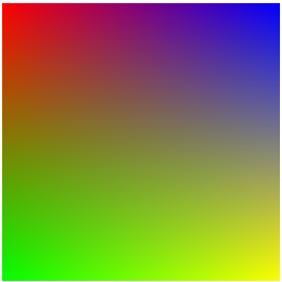

- 코드 설명 : 양 네 귀퉁이의 색상을 설정하고, 그 이후 이중 for루프문을 이용해서 bilinear interpolation을 구현해주었습니다.

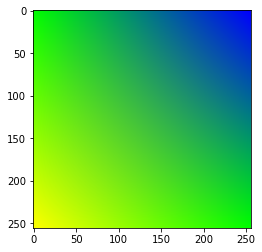

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def Bilinear_rect():

    # Color rectangle 생성
    g = np.zeros((256,256,3), np.uint8)
    
    # 각 네 모서리가 (255, 0, 0), (0, 0, 255), (0, 255, 0), (255, 255, 0)가 되도록 구현
    g[0,0,:] = (0,0,255)
    g[0,255,:] = (255,0,0)
    g[255,0,:] = (0,255,0)
    g[255,255,:] = (0,255,255)
    
    for i in range(256):
        g[0,i,:] = (i, 0, 255-i)
        g[255,255-i,:] = (0, 255, 255-i)
        
    for i in range(256):
        for j in range(256):
            A = g[0,255-i,:]
            B = g[255,i,:]
            g[i,j,:] = (A*(j/255) + B*((255-j)/255))
            
    return g

g = Bilinear_rect()
Bilinear_rectangle = cv.cvtColor(g, cv.COLOR_BGR2RGB)
plt.imshow(Bilinear_rectangle)
plt.show()
